In [ ]:
from collections.abc import Mapping
#import xarray as xr
#import rioxarray as rxr
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Read the CSV files into DataFrames
df_model = pd.read_csv('/content/drive/MyDrive/ATM_MOD/AMSTERDAM/AMSTERDAM_2016_2017.csv')
df_FILLED_2014_2017 = pd.read_csv('/content/drive/MyDrive/ATM_MOD/AMSTERDAM/Amsterdam_FILLED_2014_2017_updated.csv')
df_GF=pd.read_csv('/content/drive/MyDrive/ATM_MOD/AMSTERDAM/Amsterdam_GFv1.csv')
df_FILLED_2014_2017.rename(columns={'value': 'Temperature value'}, inplace=True)
df_GF.rename(columns={'value': 'Temperature value'}, inplace=True)
df_FILLED_2014_2017.rename(columns={'name': 'Station'}, inplace=True)
df_GF.rename(columns={'name': 'Station'}, inplace=True)

station_coordinates=  pd.read_csv('/content/drive/MyDrive/ATM_MOD/AMSTERDAM/XY_Amsterdam_filtered.csv')
import pandas as pd



unique_names = df_GF['Station'].unique()
# Create a dictionary to store DataFrames for each unique name
dfs_by_name = {}

# Iterate over unique names
for name in unique_names:
    # Filter the original DataFrame for rows with the current name
    data_for_name = df_GF[df_GF['Station'] == name]
    # Store the filtered DataFrame in the dictionary with the name as the key
    dfs_by_name[name] = data_for_name
    globals()[f'df_{name}'] = data_for_name

unique_names = df_FILLED_2014_2017['Station'].unique()
# Create a dictionary to store DataFrames for each unique name
dfs_by_name = {}
# Iterate over unique names
for name in unique_names:
    # Filter the original DataFrame for rows with the current name
    data_for_name = df_FILLED_2014_2017[df_FILLED_2014_2017['Station'] == name]
    # Store the filtered DataFrame in the dictionary with the name as the key
    dfs_by_name[name] = data_for_name
    globals()[f'df_{name}'] = data_for_name


station_coordinates['Station'] = 'D' + station_coordinates['Station'].astype(str)
station_coordinates['Station'].replace({'D2236': 'D2236_FILLED', 'D2244': 'D2244_FILLED'}, inplace=True)
# Extract unique station names from the 'Station' column of your data
unique_stations = station_coordinates['Station'].unique()
station_coordinates.rename(columns={'x': 'long', 'y': 'lat'}, inplace=True)

# Create a dictionary to store merged DataFrames for each unique station
final_dfs = {}
for station in unique_stations:
    # Assuming you have DataFrames named dfs_Station1, dfs_Station2, etc., for each station
    dfs_station_name = globals().get(f'df_{station}', pd.DataFrame())  # Get DataFrame for the current station
    # Perform merge operation with the original DataFrame 'df' on 'Station' column
    merged_df = pd.merge(dfs_station_name, station_coordinates, on='Station')
    # Store the merged DataFrame in the dictionary with the station name as the key
    final_dfs[station] = merged_df
    # Store the merged DataFrame as a global variable with name final_{stationname}
    globals()[f'final_{station}'] = merged_df






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

def find_nearest_point(station, x_list, y_list):
    station_lat, station_lon = station['lat'], station['long']
    min_distance = float('inf')
    best_x, best_y = None, None

    for x, y in zip(x_list, y_list):
        distance = haversine(station_lat, station_lon, y, x)
        if distance < min_distance:
            min_distance = distance
            best_x, best_y = x, y

    return {'x': best_x, 'y': best_y, 'min_distance': min_distance}



In [ ]:
x_list = df_model['x']
y_list = df_model['y']

station_names = ['final_D2194','final_D2195','final_D2198','final_D2199', 'final_D2221', 'final_D2222', 'final_D2223', 'final_D2225', 'final_D2226', 'final_D2227',
                 'final_D2228', 'final_D2230', 'final_D2231', 'final_D2235', 'final_D2236_FILLED', 'final_D2244_FILLED']

for station_name, station_df in zip(station_names, [final_D2194,final_D2195,final_D2198,final_D2199, final_D2221, final_D2222, final_D2223, final_D2225, final_D2226, final_D2227,
                 final_D2228, final_D2230, final_D2231, final_D2235, final_D2236_FILLED, final_D2244_FILLED]):
    # Initialize variables to store the nearest coordinates
    nearest_x, nearest_y = None, None
    min_distance = float('inf')

    # Get the coordinates of the station
    station_lat = station_df['lat'] if isinstance(station_df['lat'], float) else float(station_df['lat'].values[0])
    station_long = station_df['long'] if isinstance(station_df['long'], float) else float(station_df['long'].values[0])

    # Loop over each x and y coordinate
    for x, y in zip(x_list, y_list):
        # Calculate distance between station and current x, y coordinate
        distance = haversine(station_lat, station_long, y, x)
        # If distance is smaller than current minimum distance, update nearest coordinates
        if distance < min_distance:
            min_distance = distance
            nearest_x, nearest_y = x, y

    # Print dictionary entry for the station with nearest coordinates
    print(f"'{station_name}': {{'y': ({station_lat}, {nearest_y}), 'x': ({station_long}, {nearest_x})}},")


'final_D2194': {'y': (52.36874, 52.368237), 'x': (4.88884, 4.8938107)},
'final_D2195': {'y': (52.39649, 52.3965), 'x': (4.95789, 4.9574075)},
'final_D2198': {'y': (52.37096, 52.368237), 'x': (4.90616, 4.898522)},
'final_D2199': {'y': (52.31726, 52.317593), 'x': (4.87797, 4.8785005)},
'final_D2221': {'y': (52.35382, 52.354103), 'x': (4.94016, 4.939742)},
'final_D2222': {'y': (52.3679, 52.368237), 'x': (5.0144, 5.013938)},
'final_D2223': {'y': (52.35906, 52.358814), 'x': (4.82495, 4.8255033)},
'final_D2225': {'y': (52.36666, 52.367058), 'x': (4.87054, 4.8702564)},
'final_D2226': {'y': (52.3558, 52.35528), 'x': (4.99615, 4.9962726)},
'final_D2227': {'y': (52.37799, 52.37766), 'x': (4.89422, 4.8938107)},
'final_D2228': {'y': (52.3922, 52.39179), 'x': (4.94083, 4.94092)},
'final_D2230': {'y': (52.3585, 52.358814), 'x': (4.86209, 4.8620124)},
'final_D2231': {'y': (52.36322, 52.363525), 'x': (4.93824, 4.9385643)},
'final_D2235': {'y': (52.35675, 52.35057), 'x': (4.91571, 4.9291425)},
'final_D

In [ ]:



coordinates_mapping = {
    'final_D2194': {'y': (52.36874, 52.368237), 'x': (4.88884, 4.8938107)},
    'final_D2195': {'y': (52.39649, 52.3965), 'x': (4.95789, 4.9574075)},
    'final_D2198': {'y': (52.37096, 52.368237), 'x': (4.90616, 4.898522)},
    'final_D2199': {'y': (52.31726, 52.317593), 'x': (4.87797, 4.8785005)},
    'final_D2221': {'y': (52.35382, 52.354103), 'x': (4.94016, 4.939742)},
    'final_D2222': {'y': (52.3679, 52.368237), 'x': (5.0144, 5.013938)},
    'final_D2223': {'y': (52.35906, 52.358814), 'x': (4.82495, 4.8255033)},
    'final_D2225': {'y': (52.36666, 52.367058), 'x': (4.87054, 4.8702564)},
    'final_D2226': {'y': (52.3558, 52.35528), 'x': (4.99615, 4.9962726)},
    'final_D2227': {'y': (52.37799, 52.37766), 'x': (4.89422, 4.8938107)},
    'final_D2228': {'y': (52.3922, 52.39179), 'x': (4.94083, 4.94092)},
    'final_D2230': {'y': (52.3585, 52.358814), 'x': (4.86209, 4.8620124)},
    'final_D2231': {'y': (52.36322, 52.363525), 'x': (4.93824, 4.9385643)},
    'final_D2235': {'y': (52.35675, 52.35057), 'x': (4.91571, 4.9291425)}
}










# Iterate over each station and add new coordinates
for station_name, coordinates in coordinates_mapping.items():
    station_df = globals()[station_name]  # Get the DataFrame for the station
    station_df['x'] = coordinates['x'][1]
    station_df['y'] = coordinates['y'][1]
    station_df=station_df[['DateTime','x', 'y', 'Temperature value', 'Station', 'toolkit_representation']]
    globals()[station_name] = station_df  # Update the DataFrame in the global namespace





coordinates_mapping = {
    'final_D2236_FILLED': {'y': (52.3505, 52.35057), 'x': (4.89411, 4.8938107)},
    'final_D2244_FILLED': {'y': (52.37767, 52.37766), 'x': (4.88319, 4.8832116)}
}


final_D2244_FILLED.rename(columns={'datetime': 'DateTime', 'value : temp': 'Temperature value', 'toolkit_representation : temp': 'toolkit_representation'}, inplace=True)
final_D2236_FILLED.rename(columns={'datetime': 'DateTime', 'value : temp': 'Temperature value', 'toolkit_representation : temp': 'toolkit_representation'}, inplace=True)



for station_name, coordinates in coordinates_mapping.items():
    station_df = globals()[station_name]  # Get the DataFrame for the station
    station_df['x'] = coordinates['x'][1]
    station_df['y'] = coordinates['y'][1]
    station_df=station_df[['DateTime','x', 'y', 'Temperature value', 'Station', 'toolkit_representation']]
    globals()[station_name] = station_df  # Update the DataFrame in the global namespace








observation_data = pd.concat([final_D2194, final_D2195,final_D2198, final_D2199, final_D2221, final_D2222, final_D2223, final_D2225, final_D2226, final_D2227, final_D2228, final_D2230, final_D2231, final_D2236_FILLED, final_D2244_FILLED], ignore_index=True)


df_model['time'] = pd.to_datetime(df_model['time'])
df_model['x'] = df_model['x']
df_model['y'] = df_model['y']
observation_data['time'] = pd.to_datetime(observation_data['DateTime'])
test = pd.merge(observation_data, df_model, on=['x', 'y', 'time'], how='inner')
#test = test.drop(columns=['index_x', 'obstype', 'label'])  # Remove specified columns
unique_stations = test['Station'].unique()

In [ ]:


# Count NaN values per column before dropping
test_nan_before_drop = test.isnull().sum()

# Drop rows with NaN values in 'T_TARGET' column
test = test.dropna(subset=['T_TARGET'])

test = test.rename(columns={'T_2M': 'T2M_NC'})
test = test.rename(columns={'T_2M_COR': 'T2M'})

test['T2M_difference'] = test['T_TARGET'] - test['T2M']
test['T2M'] = test['T2M'] - 273.15
test['T2M_NC'] = test['T2M_NC'] - 273.15

test = test.dropna(subset=['T2M_difference'])

# Count NaN values per column after dropping 'T_TARGET'
test_nan_after_drop = test.isnull().sum()

# Fill NaN values with 0 in 'CBH' column

# Count NaN values per column after filling with 0
test_nan_after_fill = test.isnull().sum()

# Fill NaN values with the median value of the specific 'City'
for column in test.columns:
    if test[column].isnull().any():
        test[column] = test.groupby('city')[column].transform(lambda x: x.fillna(x.median()))







# Count NaN values per column after filling with median
test_nan_after_median_fill = test.isnull().sum()

# Calculate number of NaN values filled and dropped per column
test_nan_filled = test_nan_before_drop - test_nan_after_fill

test_nan_dropped = test_nan_after_drop - test_nan_after_median_fill

# Writing results to a file
with open('run_time.txt', 'a') as f:
    f.write("NaN values filled per column before dropping 'T_TARGET':\n")
    f.write("Test Data:\n")
    f.write(test_nan_filled.to_string() + "\n")
    f.write("\n")
    f.write("NaN values dropped per column after dropping 'T_TARGET':\n")
    f.write("Test Data:\n")
    f.write(test_nan_dropped.to_string() + "\n")


y_test = test['T2M_difference']
X_test = test[['LC_CORINE', 'IMPERV', 'HEIGHT', 'COAST', 'ELEV', 'POP', 'RH', 'SP', 'PRECIP','T2M', 'WS', 'TCC', 'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL']]
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Define temporal and spatial features
temporal_feat = [ 'RH', 'SP', 'PRECIP', 'T2M', 'WS','TCC',  'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL']
spatial_feat = ['LC_CORINE', 'IMPERV', 'HEIGHT',  'COAST', 'ELEV', 'POP']

# Load the model
model = joblib.load("/content/drive/MyDrive/ATM_MOD/GHENT/model_FINAL.joblib")


# Make predictions
y_pred = model.predict(X_test)+X_test['T2M']
y_test=test['T2M_difference'] +X_test['T2M']

test['y_pred']=y_pred
test['y_test']=y_test
test['ERA5']=X_test['T2M']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
test.rename(columns={'Temperature value': 'Temperature'}, inplace=True)

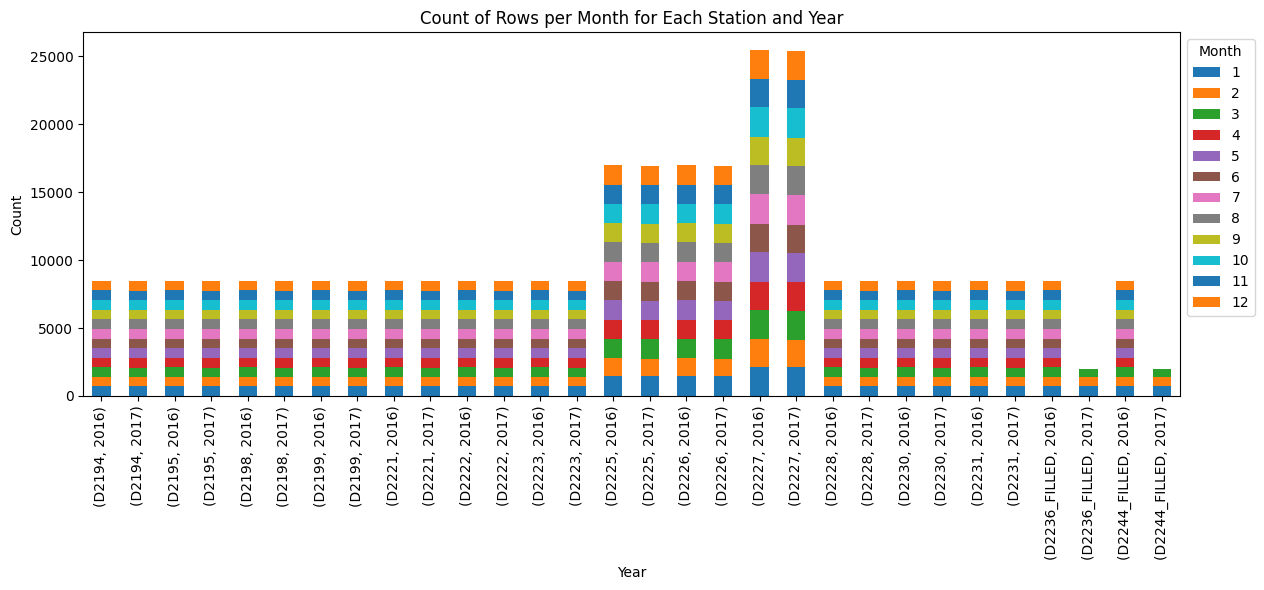

In [ ]:
test['Station'].unique()

#how many obs per month per year


import pandas as pd
import matplotlib.pyplot as plt
df=test
# Assuming 'test' is your DataFrame
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year and month from the DateTime column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by station, year, and month and count rows in each group
rows_per_station_per_year_per_month = df.groupby(['Station', 'Year', 'Month']).size()

# Unstack the multi-index to make it easier to plot
rows_per_station_per_year_per_month = rows_per_station_per_year_per_month.unstack(level='Month')

# Plotting
rows_per_station_per_year_per_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Rows per Month for Each Station and Year')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
test['Year'] = test['DateTime'].dt.year
test['Month'] = test['DateTime'].dt.month
test = test[~((test['Station'] == 'D2236_FILLED') & (test['Year'] == 2017))]
test = test[~((test['Station'] == 'D2244_FILLED') & (test['Year'] == 2017))]



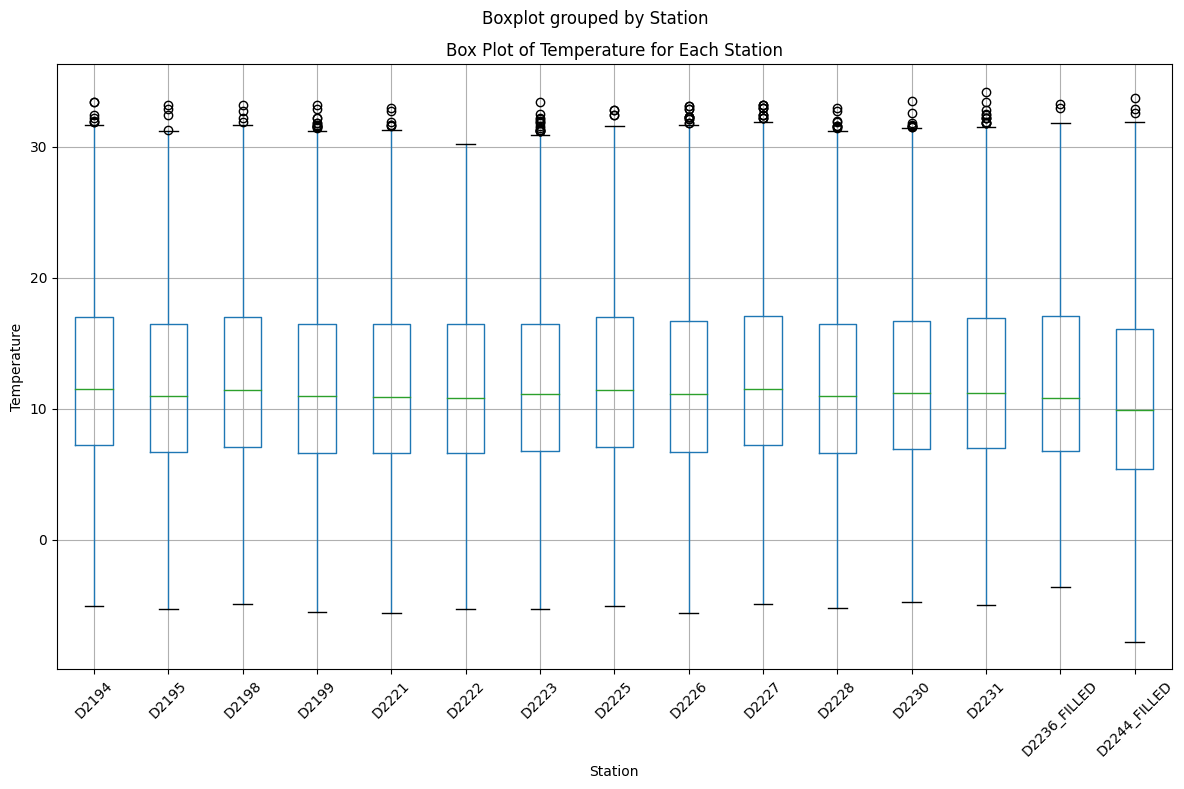

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' is your DataFrame

# Create separate box plots for 'Temperature' column for each 'Station'
test.boxplot(column='Temperature', by='Station', figsize=(12, 8))

# Add labels and title
plt.xlabel('Station')
plt.ylabel('Temperature')
plt.title('Box Plot of Temperature for Each Station')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **FINAL SET OF STATIONS:**

In [ ]:
test['Station'].unique()

array(['D2194', 'D2195', 'D2198', 'D2199', 'D2221', 'D2222', 'D2223',
       'D2225', 'D2226', 'D2227', 'D2228', 'D2230', 'D2231',
       'D2236_FILLED', 'D2244_FILLED'], dtype=object)

In [ ]:
import pandas as pd

# Assuming 'test' is your DataFrame
test.loc[test['Station'] == 'D2236_FILLED', 'Station'] = 'D2236'
test.loc[test['Station'] == 'D2244_FILLED', 'Station'] = 'D2244'

# Check unique values after renaming
print(test['Station'].unique())


['D2194' 'D2195' 'D2198' 'D2199' 'D2221' 'D2222' 'D2223' 'D2225' 'D2226'
 'D2227' 'D2228' 'D2230' 'D2231' 'D2236' 'D2244']


## **CALCULATE SCORES**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate bias
bias_y_pred_vs_y_test = np.mean(test['y_pred'] - test['y_test'])
bias_y_pred_vs_Temperature = np.mean(test['y_pred'] - test['Temperature'])
bias_y_test_vs_Temperature = np.mean(test['y_test'] - test['Temperature'])
bias_ERA5_vs_Temperature = np.mean(test['ERA5'] - test['Temperature'])

# Calculate RMSE
rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(test['y_test'], test['y_pred']))
rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(test['Temperature'], test['y_pred']))
rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(test['Temperature'], test['y_test']))
rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(test['Temperature'], test['ERA5']))

# Calculate MAE
mae_y_pred_vs_y_test = mean_absolute_error(test['y_test'], test['y_pred'])
mae_y_pred_vs_Temperature = mean_absolute_error(test['Temperature'], test['y_pred'])
mae_y_test_vs_Temperature = mean_absolute_error(test['Temperature'], test['y_test'])
mae_ERA5_vs_Temperature = mean_absolute_error(test['Temperature'], test['ERA5'])


print("Bias (EURO-RFUE vs UrbClim):", round(bias_y_pred_vs_y_test, 3))
print("RMSE (EURO-RFUE vs UrbClim):", round(rmse_y_pred_vs_y_test, 3))
print("MAE (EURO-RFUE vs UrbClim):", round(mae_y_pred_vs_y_test, 3))

print("\nBias (EURO-RFUE vs Observation):", round(bias_y_pred_vs_Temperature, 3))
print("RMSE (EURO-RFUE vs Observation):", round(rmse_y_pred_vs_Temperature, 3))
print("MAE (EURO-RFUE vs Observation):", round(mae_y_pred_vs_Temperature, 3))

print("\nBias (UrbClim vs Observation):", round(bias_y_test_vs_Temperature, 3))
print("RMSE (UrbClim vs Observation):", round(rmse_y_test_vs_Temperature, 3))
print("MAE (UrbClim vs Observation):", round(mae_y_test_vs_Temperature, 3))

print("\nBias (ERA5 vs Observation):", round(bias_ERA5_vs_Temperature, 3))
print("RMSE (ERA5 vs Observation):", round(rmse_ERA5_vs_Temperature, 3))
print("MAE (ERA5 vs Observation):", round(mae_ERA5_vs_Temperature, 3))


Bias (EURO-RFUE vs UrbClim): -0.769
RMSE (EURO-RFUE vs UrbClim): 1.263
MAE (EURO-RFUE vs UrbClim): 0.945

Bias (EURO-RFUE vs Observation): 0.099
RMSE (EURO-RFUE vs Observation): 0.977
MAE (EURO-RFUE vs Observation): 0.724

Bias (UrbClim vs Observation): 0.868
RMSE (UrbClim vs Observation): 1.483
MAE (UrbClim vs Observation): 1.096

Bias (ERA5 vs Observation): -0.811
RMSE (ERA5 vs Observation): 1.48
MAE (ERA5 vs Observation): 1.09


In [ ]:
test_night=test[test['SOLAR_ELEV']<0]
# Calculate bias
bias_y_pred_vs_y_test = np.mean(test_night['y_pred'] - test_night['y_test'])
bias_y_pred_vs_Temperature = np.mean(test_night['y_pred'] - test_night['Temperature'])
bias_y_test_vs_Temperature = np.mean(test_night['y_test'] - test_night['Temperature'])
bias_ERA5_vs_Temperature = np.mean(test_night['ERA5'] - test_night['Temperature'])

# Calculate RMSE
rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(test_night['y_test'], test_night['y_pred']))
rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(test_night['Temperature'], test_night['y_pred']))
rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(test_night['Temperature'], test_night['y_test']))
rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(test_night['Temperature'], test_night['ERA5']))

# Calculate MAE
mae_y_pred_vs_y_test = mean_absolute_error(test_night['y_test'], test_night['y_pred'])
mae_y_pred_vs_Temperature = mean_absolute_error(test_night['Temperature'], test_night['y_pred'])
mae_y_test_vs_Temperature = mean_absolute_error(test_night['Temperature'], test_night['y_test'])
mae_ERA5_vs_Temperature = mean_absolute_error(test_night['Temperature'], test_night['ERA5'])

print("Bias (EURO-RFUE vs UrbClim):", round(bias_y_pred_vs_y_test, 3))
print("RMSE (EURO-RFUE vs UrbClim):", round(rmse_y_pred_vs_y_test, 3))
print("MAE (EURO-RFUE vs UrbClim):", round(mae_y_pred_vs_y_test, 3))

print("\nBias (EURO-RFUE vs Observation):", round(bias_y_pred_vs_Temperature, 3))
print("RMSE (EURO-RFUE vs Observation):", round(rmse_y_pred_vs_Temperature, 3))
print("MAE (EURO-RFUE vs Observation):", round(mae_y_pred_vs_Temperature, 3))

print("\nBias (UrbClim vs Observation):", round(bias_y_test_vs_Temperature, 3))
print("RMSE (UrbClim vs Observation):", round(rmse_y_test_vs_Temperature, 3))
print("MAE (UrbClim vs Observation):", round(mae_y_test_vs_Temperature, 3))

print("\nBias (ERA5 vs Observation):", round(bias_ERA5_vs_Temperature, 3))
print("RMSE (ERA5 vs Observation):", round(rmse_ERA5_vs_Temperature, 3))
print("MAE (ERA5 vs Observation):", round(mae_ERA5_vs_Temperature, 3))



Bias (EURO-RFUE vs UrbClim): -1.019
RMSE (EURO-RFUE vs UrbClim): 1.476
MAE (EURO-RFUE vs UrbClim): 1.134

Bias (EURO-RFUE vs Observation): 0.014
RMSE (EURO-RFUE vs Observation): 0.997
MAE (EURO-RFUE vs Observation): 0.744

Bias (UrbClim vs Observation): 1.033
RMSE (UrbClim vs Observation): 1.597
MAE (UrbClim vs Observation): 1.19

Bias (ERA5 vs Observation): -1.243
RMSE (ERA5 vs Observation): 1.794
MAE (ERA5 vs Observation): 1.372


In [ ]:
test_day=test[test['SOLAR_ELEV']>0]
# Calculate bias
bias_y_pred_vs_y_test = np.mean(test_day['y_pred'] - test_day['y_test'])
bias_y_pred_vs_Temperature = np.mean(test_day['y_pred'] - test_day['Temperature'])
bias_y_test_vs_Temperature = np.mean(test_day['y_test'] - test_day['Temperature'])
bias_ERA5_vs_Temperature = np.mean(test_day['ERA5'] - test_day['Temperature'])

# Calculate RMSE
rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(test_day['y_test'], test_day['y_pred']))
rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(test_day['Temperature'], test_day['y_pred']))
rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(test_day['Temperature'], test_day['y_test']))
rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(test_day['Temperature'], test_day['ERA5']))

# Calculate MAE
mae_y_pred_vs_y_test = mean_absolute_error(test_day['y_test'], test_day['y_pred'])
mae_y_pred_vs_Temperature = mean_absolute_error(test_day['Temperature'], test_day['y_pred'])
mae_y_test_vs_Temperature = mean_absolute_error(test_day['Temperature'], test_day['y_test'])
mae_ERA5_vs_Temperature = mean_absolute_error(test_day['Temperature'], test_day['ERA5'])

print("Bias (EURO-RFUE vs UrbClim):", round(bias_y_pred_vs_y_test, 3))
print("RMSE (EURO-RFUE vs UrbClim):", round(rmse_y_pred_vs_y_test, 3))
print("MAE (EURO-RFUE vs UrbClim):", round(mae_y_pred_vs_y_test, 3))

print("\nBias (EURO-RFUE vs Observation):", round(bias_y_pred_vs_Temperature, 3))
print("RMSE (EURO-RFUE vs Observation):", round(rmse_y_pred_vs_Temperature, 3))
print("MAE (EURO-RFUE vs Observation):", round(mae_y_pred_vs_Temperature, 3))

print("\nBias (UrbClim vs Observation):", round(bias_y_test_vs_Temperature, 3))
print("RMSE (UrbClim vs Observation):", round(rmse_y_test_vs_Temperature, 3))
print("MAE (UrbClim vs Observation):", round(mae_y_test_vs_Temperature, 3))

print("\nBias (ERA5 vs Observation):", round(bias_ERA5_vs_Temperature, 3))
print("RMSE (ERA5 vs Observation):", round(rmse_ERA5_vs_Temperature, 3))
print("MAE (ERA5 vs Observation):", round(mae_ERA5_vs_Temperature, 3))



Bias (EURO-RFUE vs UrbClim): -0.522
RMSE (EURO-RFUE vs UrbClim): 1.011
MAE (EURO-RFUE vs UrbClim): 0.758

Bias (EURO-RFUE vs Observation): 0.182
RMSE (EURO-RFUE vs Observation): 0.957
MAE (EURO-RFUE vs Observation): 0.705

Bias (UrbClim vs Observation): 0.704
RMSE (UrbClim vs Observation): 1.361
MAE (UrbClim vs Observation): 1.004

Bias (ERA5 vs Observation): -0.383
RMSE (ERA5 vs Observation): 1.083
MAE (ERA5 vs Observation): 0.811


Hour of negative to positive transition: 5
Hour of positive to negative transition: 20


<ipython-input-16-10107baa1c50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['DateTime'])


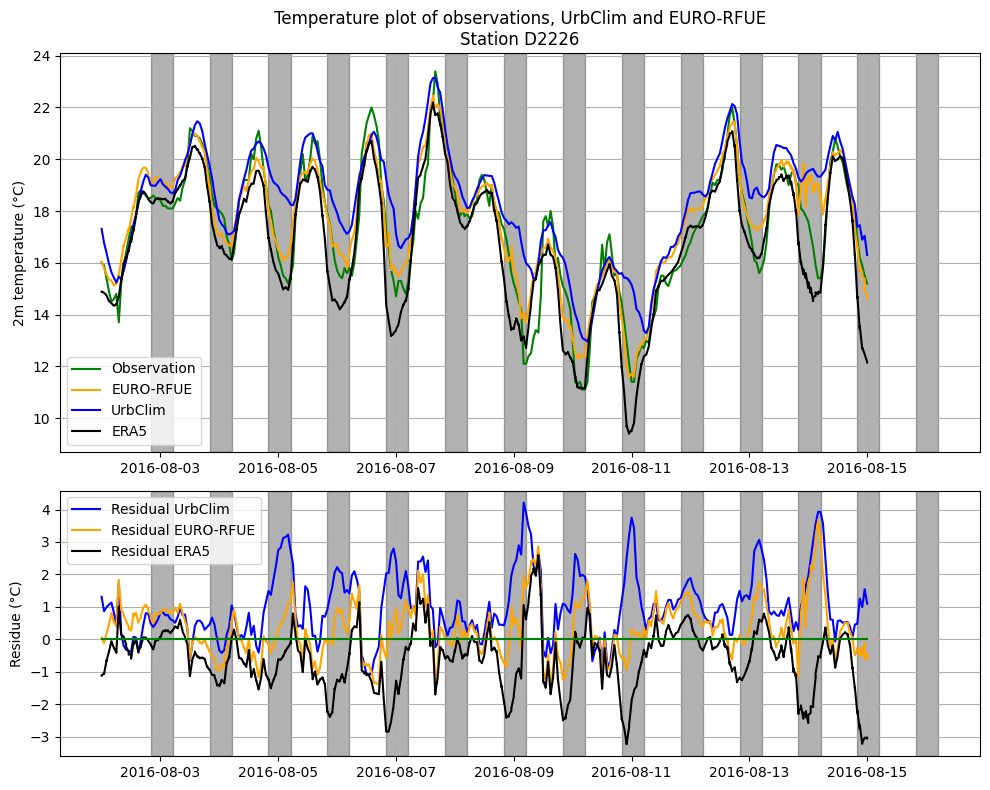

In [ ]:





import matplotlib.pyplot as plt
df = test[(test['x'] == 4.9962726) & (test['y'] == 52.35528)]  #STATION BAS
#'final_D2226': {'y': (52.3558, 52.35528), 'x': (4.99615, 4.9962726)},

import matplotlib.pyplot as plt

# Convert 'DateTime' column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data for the specified date range
start_date = '2016-08-02'
end_date = '2016-08-15'
filtered_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]
import numpy as np

# Find the indices where SOLAR_ELEV changes sign from negative to positive
positive_indices = np.where((filtered_data['SOLAR_ELEV'].shift(1) < 0) & (filtered_data['SOLAR_ELEV'] >= 0))[0]

# Find the indices where SOLAR_ELEV changes sign from positive to negative
negative_indices = np.where((filtered_data['SOLAR_ELEV'].shift(1) > 0) & (filtered_data['SOLAR_ELEV'] <= 0))[0]

# Take the first hour from each set of indices
hour_negative_to_positive = filtered_data.iloc[positive_indices[0]]['hour']
hour_positive_to_negative = filtered_data.iloc[negative_indices[0]]['hour']

print("Hour of negative to positive transition:", hour_negative_to_positive)
print("Hour of positive to negative transition:", hour_positive_to_negative)
import pandas as pd









# Create figure and axes for both plots with adjusted height ratio
fig, (ax1, residual_ax) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 2]})

# Define nighttime shading
start_night = pd.to_datetime(f'{hour_positive_to_negative}:00').time()
end_night = pd.to_datetime(f'0{hour_negative_to_positive}:00').time()

for ax in [ax1, residual_ax]:
    for day in pd.date_range(start=start_date, end=end_date, freq='D'):
        ax.axvspan(day + pd.Timedelta(hours=start_night.hour), day + pd.Timedelta(hours=24 + end_night.hour), color='k', alpha=0.3)







# Plot Temperature, y_pred, and y_test on the upper plot
ax1.plot(filtered_data['DateTime'], filtered_data['Temperature'], label='Observation', color='green')
ax1.plot(filtered_data['DateTime'], filtered_data['y_pred'], label='EURO-RFUE', color='orange')
ax1.plot(filtered_data['DateTime'], filtered_data['y_test'], label='UrbClim', color='blue')
ax1.plot(filtered_data['DateTime'], filtered_data['ERA5'], label='ERA5', color='black')

# Customize upper plot
#ax.set_xlabel('Time')
ax1.set_ylabel('2m temperature (°C)')
ax1.set_title('Temperature plot of observations, UrbClim and EURO-RFUE\nStation D2226')
ax1.legend()
ax1.grid(True)

# Calculate residuals
residual_y_test = filtered_data['y_test'] - filtered_data['Temperature']
residual_y_pred = filtered_data['y_pred'] - filtered_data['Temperature']
residual_ERA5 = filtered_data['ERA5'] - filtered_data['Temperature']

# Plot residuals on the lower plot
residual_ax.plot(filtered_data['DateTime'], residual_y_test, label='Residual UrbClim', color='blue')
residual_ax.plot(filtered_data['DateTime'], residual_y_pred, label='Residual EURO-RFUE', color='orange')
residual_ax.plot(filtered_data['DateTime'], residual_ERA5, label='Residual ERA5', color='black')
residual_ax.plot(filtered_data['DateTime'], residual_y_pred * 0.0, color='green')

# Customize lower plot
#residual_ax.set_xlabel('Time')
residual_ax.set_ylabel('Residue (°C)')
residual_ax.grid()
residual_ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



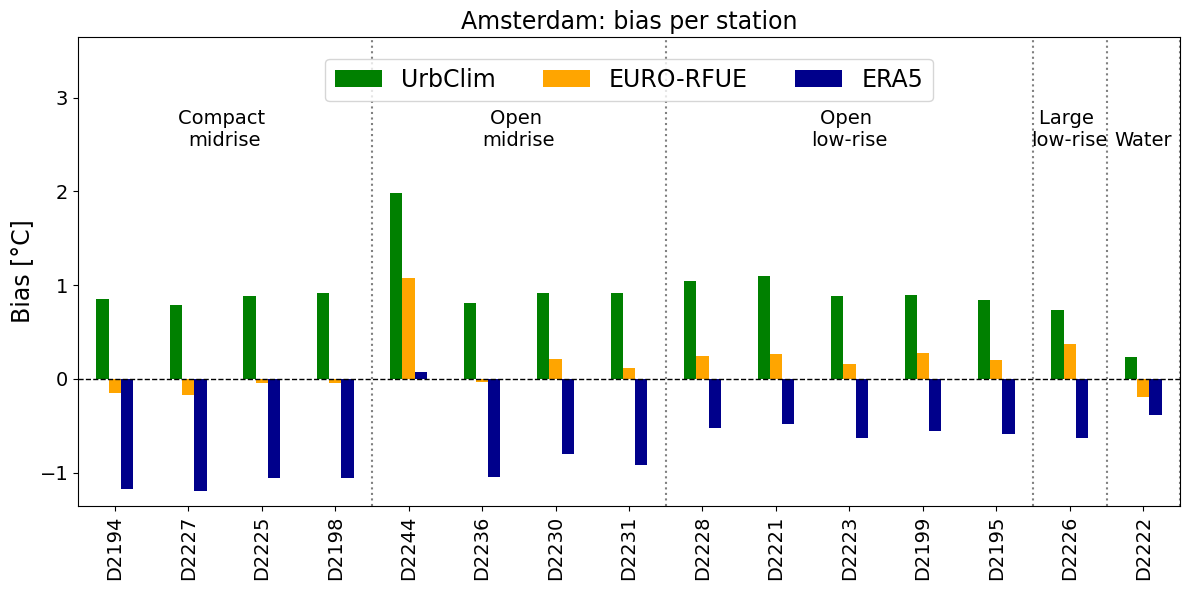

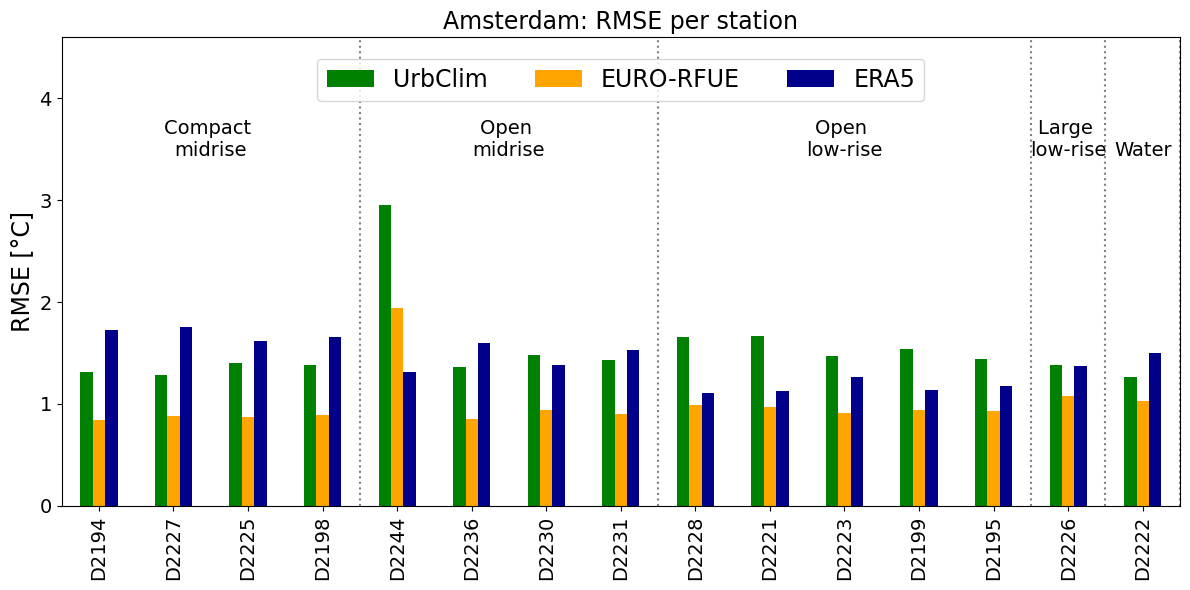

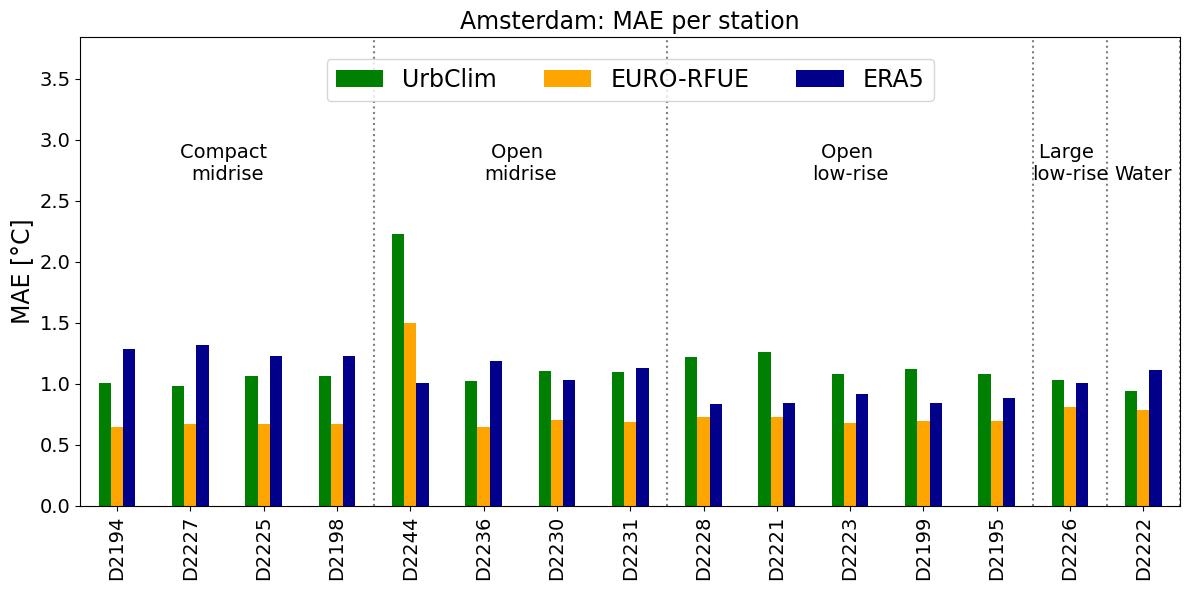

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sort the test DataFrame by the LCZ column
test_sorted = test.sort_values(by='LCZ')

# Get the unique stations in the sorted order
stations_sorted = test_sorted['Station'].unique()

# Initialize dictionaries to store metrics
rmse_dict = {}
mae_dict = {}
bias_dict = {}

for station in stations_sorted:
    station_data = test_sorted[test_sorted['Station'] == station]

    # Calculate Bias
    bias_y_pred_vs_y_test = np.mean(station_data['y_pred'] - station_data['y_test'])
    bias_y_test_vs_Temperature = np.mean(station_data['y_test'] - station_data['Temperature'])
    bias_y_pred_vs_Temperature = np.mean(station_data['y_pred'] - station_data['Temperature'])
    bias_ERA5_vs_Temperature = np.mean(station_data['ERA5'] - station_data['Temperature'])
    bias_dict[station] = [bias_y_test_vs_Temperature, bias_y_pred_vs_Temperature, bias_ERA5_vs_Temperature]

    # Calculate RMSE
    rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(station_data['y_test'], station_data['y_pred']))
    rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(station_data['y_test'], station_data['Temperature']))
    rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(station_data['y_pred'], station_data['Temperature']))
    rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(station_data['ERA5'], station_data['Temperature']))
    rmse_dict[station] = [rmse_y_test_vs_Temperature, rmse_y_pred_vs_Temperature, rmse_ERA5_vs_Temperature]

    # Calculate MAE
    mae_y_pred_vs_y_test = mean_absolute_error(station_data['y_test'], station_data['y_pred'])
    mae_y_test_vs_Temperature = mean_absolute_error(station_data['y_test'], station_data['Temperature'])
    mae_y_pred_vs_Temperature = mean_absolute_error(station_data['y_pred'], station_data['Temperature'])
    mae_ERA5_vs_Temperature = mean_absolute_error(station_data['ERA5'], station_data['Temperature'])
    mae_dict[station] = [mae_y_test_vs_Temperature, mae_y_pred_vs_Temperature, mae_ERA5_vs_Temperature]

# Create DataFrame from dictionaries
bias_df = pd.DataFrame.from_dict(bias_dict, orient='index', columns=['Bias_y_test_vs_Temperature', 'Bias_y_pred_vs_Temperature', 'Bias_ERA5_vs_Temperature'])
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE_y_test_vs_Temperature', 'RMSE_y_pred_vs_Temperature', 'RMSE_ERA5_vs_Temperature'])
mae_df = pd.DataFrame.from_dict(mae_dict, orient='index', columns=['MAE_y_test_vs_Temperature', 'MAE_y_pred_vs_Temperature', 'MAE_ERA5_vs_Temperature'])

# Reorder the DataFrames according to sorted stations
bias_df = bias_df.loc[stations_sorted]
rmse_df = rmse_df.loc[stations_sorted]
mae_df = mae_df.loc[stations_sorted]

# Function to add vertical lines and labels for LCZ groups
def add_lcz_lines_and_labels(ax, test_sorted, stations_sorted):
    lczs_sorted = test_sorted['LCZ'].unique()
    lcz_labels = {
        1: 'Compact \nhigh-rise',
        2: 'Compact \nmidrise',
        3: 'Compact \nlow-rise',
        4: 'Open \nhigh-rise',
        5: 'Open \nmidrise',
        6: 'Open \nlow-rise',
        7: 'Lightweight \nlow-rise',
        8: 'Large \nlow-rise',
        9: 'Sparsely \nbuilt',
        10: 'Heavy \nindustry',
        11: 'Dense \ntrees',
        12: 'Scattered \ntrees',
        13: 'Bush, scrub',
        14: 'Low \nplants',
        15: 'Bare rock \nor paved',
        16: 'Bare soil \nor sand',
        17: 'Water'
    }
    x_ticks = ax.get_xticks()
    for i, lcz in enumerate(lczs_sorted):
        group = test_sorted[test_sorted['LCZ'] == lcz]['Station'].unique()
        cumulative_position = sum(test_sorted[test_sorted['LCZ'] == lczs_sorted[j]]['Station'].unique().size for j in range(i + 1)) - 1
        if cumulative_position + 0.5 < len(x_ticks):
            ax.axvline(x=cumulative_position + 0.5, color='gray', linestyle='dotted')
            ax.text((cumulative_position - len(group) / 2) + 0.5, max(ax.get_ylim()) - 1.2, lcz_labels[lcz], ha='center', va='bottom', fontsize=14, color='black', rotation=0)
colors = ['green', 'orange', 'darkblue']

# Plotting Bias
fig, ax_bias = plt.subplots(figsize=(12, 6))
bias_df.plot(kind='bar', ax=ax_bias, color=colors)
ax_bias.set_title('Amsterdam: bias per station', fontsize=17)
ax_bias.set_ylabel('Bias [°C]', fontsize=17)
ax_bias.legend(labels=['UrbClim', 'EURO-RFUE', 'ERA5'], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=17)
ax_bias.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax_bias.tick_params(axis='both', which='major', labelsize=14)
ylim_bias = ax_bias.get_ylim()
ax_bias.set_ylim(ylim_bias[0], ylim_bias[1] + 1.5)
add_lcz_lines_and_labels(ax_bias, test_sorted, stations_sorted)
plt.tight_layout()
plt.show()

# Plotting RMSE
fig, ax_rmse = plt.subplots(figsize=(12, 6))
rmse_df.plot(kind='bar', ax=ax_rmse, color=colors)
ax_rmse.set_title('Amsterdam: RMSE per station', fontsize=17)
ax_rmse.set_ylabel('RMSE [°C]', fontsize=17)
ax_rmse.legend(labels=['UrbClim', 'EURO-RFUE', 'ERA5'], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=17)
ylim_rmse = ax_rmse.get_ylim()
ax_rmse.set_ylim(ylim_rmse[0], ylim_rmse[1] + 1.5)
ax_rmse.tick_params(axis='both', which='major', labelsize=14)
add_lcz_lines_and_labels(ax_rmse, test_sorted, stations_sorted)
plt.tight_layout()
plt.show()

# Plotting MAE
fig, ax_mae = plt.subplots(figsize=(12, 6))
mae_df.plot(kind='bar', ax=ax_mae, color=colors)
ax_mae.set_title('Amsterdam: MAE per station', fontsize=17)
ax_mae.set_ylabel('MAE [°C]', fontsize=17)
ax_mae.legend(labels=['UrbClim', 'EURO-RFUE', 'ERA5'], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=17)
ylim_mae = ax_mae.get_ylim()
ax_mae.set_ylim(ylim_mae[0], ylim_mae[1] + 1.5)
ax_mae.tick_params(axis='both', which='major', labelsize=14)
add_lcz_lines_and_labels(ax_mae, test_sorted, stations_sorted)
plt.tight_layout()
plt.show()


In [ ]:
#ONLY OBSERVATIONS: no GAP FILLED:
test_obs=test[test['toolkit_representation']=='observation']

<ipython-input-34-2db57351136b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour'] = filtered_data['DateTime'].dt.hour
<ipython-input-34-2db57351136b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hour'] = data_filtered['DateTime'].dt.hour


Hour: 0
13032    -16.046788
30000    -16.046788
46968    -16.046788
63936    -16.073089
80904    -16.061231
97872    -16.046788
114840   -16.049567
144840   -16.073089
144841   -16.049567
178776   -16.061231
178777   -16.049567
225744   -16.046788
225745   -16.073089
225746   -16.049567
250584   -16.049567
267552   -16.061231
284520   -16.046788
Name: SOLAR_ELEV, dtype: float64
Hour: 1
13033    -14.384229
30001    -14.384229
46969    -14.384229
63937    -14.410343
80905    -14.398825
97873    -14.384229
114841   -14.388649
144842   -14.410343
144843   -14.388649
178778   -14.398825
178779   -14.388649
225747   -14.384229
225748   -14.410343
225749   -14.388649
250585   -14.388649
267553   -14.398825
284521   -14.384229
Name: SOLAR_ELEV, dtype: float64
Hour: 2
13034    -10.585578
30002    -10.585578
46970    -10.585578
63938    -10.609983
80906    -10.599465
97874    -10.585578
114842   -10.591313
144844   -10.609983
144845   -10.591313
178780   -10.599465
178781   -10.591313
225750   -

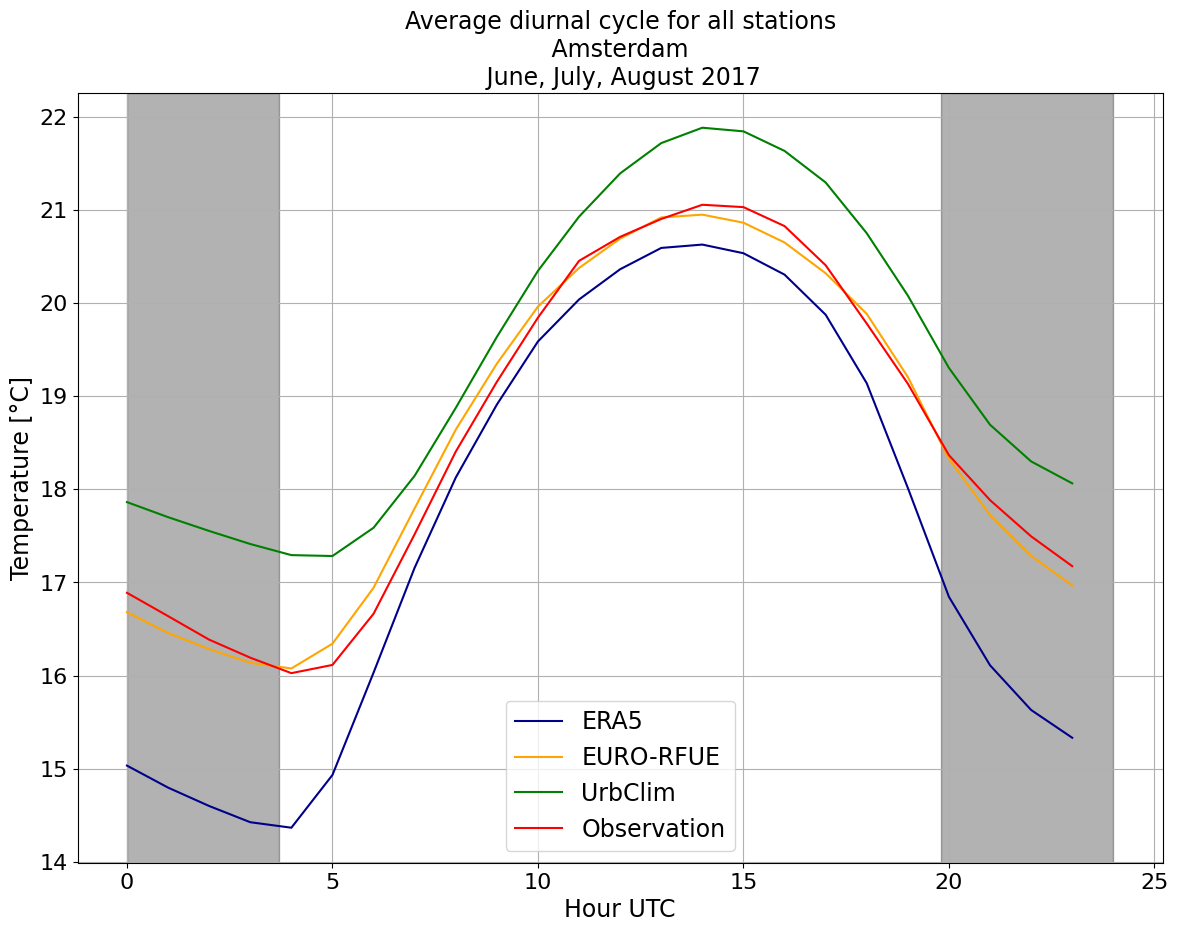

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `test` is your DataFrame
# Convert DateTime column to datetime type
test['DateTime'] = pd.to_datetime(test['DateTime'])

# Filter data for the months July, August, September and year 2017
data_filtered = test[(test['DateTime'].dt.year == 2017) &
                     (test['DateTime'].dt.month.isin([6, 7, 8]))]

# Filter data for the 15th of July, 2017
filtered_data = test[(test['DateTime'].dt.year == 2017) &
                     (test['DateTime'].dt.month == 7) &
                     (test['DateTime'].dt.day == 15)]

# Extract the hour from the DateTime for grouping
filtered_data['Hour'] = filtered_data['DateTime'].dt.hour

# Group by hour and print the SOLAR_ELEV values
for hour, group in filtered_data.groupby('Hour'):
    print(f"Hour: {hour}")
    print(group['SOLAR_ELEV'])

# Extract hour of the day for grouping
data_filtered['Hour'] = data_filtered['DateTime'].dt.hour

# Select only numeric columns and the grouping columns
numeric_columns = ['T2M', 'y_pred', 'y_test', 'Temperature']
grouping_columns = ['Hour']

# Group data by Hour and calculate the mean for numeric columns
grouped = data_filtered[grouping_columns + numeric_columns].groupby(['Hour']).mean().reset_index()

# Plotting the average diurnal cycle for all stations
plt.figure(figsize=(14, 10))

colors = ['darkblue', 'orange', 'green', 'red']
linestyles = ['-', '-', '-', '-']

for i, var in enumerate(numeric_columns):
    plt.plot(grouped['Hour'], grouped[var], label=var, color=colors[i], linestyle=linestyles[i])

plt.title('Average diurnal cycle for all stations\n Amsterdam \n June, July, August 2017', fontsize=17)
plt.xlabel('Hour UTC', fontsize=17)
plt.ylabel('Temperature [°C]', fontsize=17)

# Define nighttime shading
start_night = 19.8  # 20:00
end_night = 3.7  # 04:00

plt.axvspan(start_night, 24, color='k', alpha=0.3)  # Night starts at 20:00
plt.axvspan(0, end_night, color='k', alpha=0.3)  # Night ends at 04:00
plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(labels=['ERA5', 'EURO-RFUE', 'UrbClim' ,'Observation' ], fontsize=17)
plt.grid(True)
plt.show()


In [ ]:
test_rainy_day = test[(test['SOLAR_ELEV'] > 0) & (test['PRECIP'] > 0.001)]
test_dry_day = test[(test['SOLAR_ELEV'] > 0) & (test['PRECIP'] < 0.001)]
test_rainy_night = test[(test['SOLAR_ELEV'] < 0) & (test['PRECIP'] > 0.001)]
test_dry_night = test[(test['SOLAR_ELEV'] < 0) & (test['PRECIP'] < 0.001)]
test_cloudy_day = test[(test['SOLAR_ELEV'] > 0) & (test['TCC'] > 0.5)]
test_clear_day = test[(test['SOLAR_ELEV'] > 0) & (test['TCC'] < 0.5)]
test_cloudy_night = test[(test['SOLAR_ELEV'] < 0) & (test['TCC'] > 0.5)]
test_clear_night = test[(test['SOLAR_ELEV'] < 0) & (test['TCC'] < 0.5)]
test_windy_day = test[(test['SOLAR_ELEV'] > 0) & (test['WS'] > 4)]
test_calm_day = test[(test['SOLAR_ELEV'] > 0) & (test['WS'] < 4)]
test_windy_night = test[(test['SOLAR_ELEV'] < 0) & (test['WS'] > 4)]
test_calm_night = test[(test['SOLAR_ELEV'] < 0) & (test['WS'] < 4)]


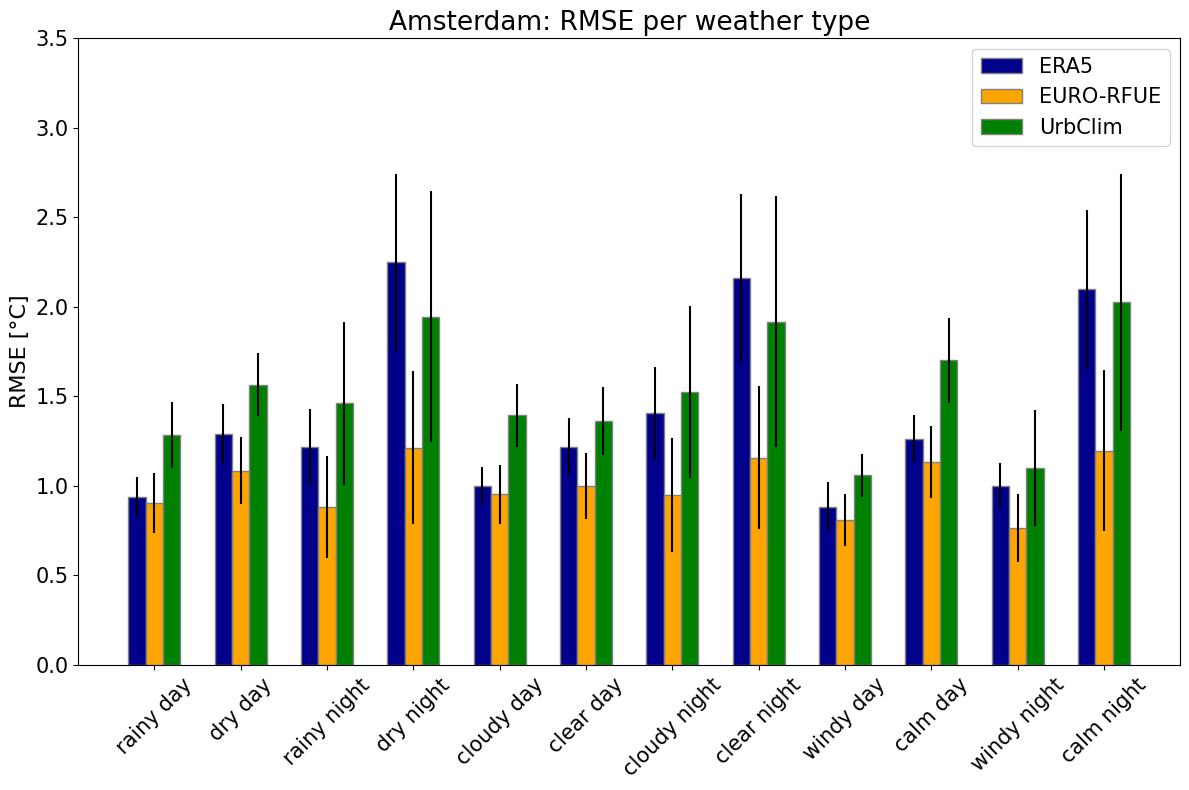

In [ ]:
# Create lists to store RMSEs for each weather type
RMSEs = []
# Define weather types
weather_types = ['rainy_day', 'dry_day', 'rainy_night', 'dry_night', 'cloudy_day', 'clear_day', 'cloudy_night', 'clear_night', 'windy_day', 'calm_day', 'windy_night', 'calm_night']

# Create lists to store RMSEs for each weather type
RMSEs = []

# Calculate RMSEs for each weather type

# Here we generate random RMSE values for demonstration
RMSE_ERA5_list = []
RMSE_y_pred_list = []
RMSE_y_test_list = []

SD_ERA5_list = []
SD_y_pred_list = []
SD_y_test_list = []

for weather_type in weather_types:
    filtered_data = globals()['test_' + weather_type]

    RMSE_ERA5_weather = []
    RMSE_y_pred_weather = []
    RMSE_y_test_weather = []

    for station in filtered_data['Station'].unique():
        station_data = filtered_data[filtered_data['Station'] == station]

        RMSE_ERA5 = np.sqrt(np.mean((station_data['ERA5'] - station_data['Temperature'])**2))
        RMSE_y_pred = np.sqrt(np.mean((station_data['y_pred'] - station_data['Temperature'])**2))
        RMSE_y_test = np.sqrt(np.mean((station_data['y_test'] - station_data['Temperature'])**2))

        RMSE_ERA5_weather.append(RMSE_ERA5)
        RMSE_y_pred_weather.append(RMSE_y_pred)
        RMSE_y_test_weather.append(RMSE_y_test)

    RMSE_ERA5_list.append(np.mean(RMSE_ERA5_weather))
    RMSE_y_pred_list.append(np.mean(RMSE_y_pred_weather))
    RMSE_y_test_list.append(np.mean(RMSE_y_test_weather))

    # Calculate standard deviations (SDs) for error bars
    SD_ERA5_list.append(np.std(RMSE_ERA5_weather))
    SD_y_pred_list.append(np.std(RMSE_y_pred_weather))
    SD_y_test_list.append(np.std(RMSE_y_test_weather))

# Convert lists to NumPy arrays for easier indexing
RMSE_ERA5_list = np.array(RMSE_ERA5_list)
RMSE_y_pred_list = np.array(RMSE_y_pred_list)
RMSE_y_test_list = np.array(RMSE_y_test_list)

SD_ERA5_list = np.array(SD_ERA5_list)
SD_y_pred_list = np.array(SD_y_pred_list)
SD_y_test_list = np.array(SD_y_test_list)

# Plotting RMSEs with error bars
fig, ax = plt.subplots(figsize=(12, 8))

barWidth = 0.2
r1 = np.arange(len(weather_types))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

colors = ['darkblue', 'orange', 'green']
labels = ['ERA5', 'EURO-RFUE', 'UrbClim']

# Plotting with error bars using SDs
ax.bar(r1, RMSE_ERA5_list, color=colors[0], width=barWidth, edgecolor='grey', label=labels[0], yerr=SD_ERA5_list)
ax.bar(r2, RMSE_y_pred_list, color=colors[1], width=barWidth, edgecolor='grey', label=labels[1], yerr=SD_y_pred_list)
ax.bar(r3, RMSE_y_test_list, color=colors[2], width=barWidth, edgecolor='grey', label=labels[2], yerr=SD_y_test_list)

weather_types_labels = ['rainy day', 'dry day', 'rainy night', 'dry night',
                 'cloudy day', 'clear day', 'cloudy night', 'clear night',
                 'windy day', 'calm day', 'windy night', 'calm night']

ax.set_xticks(r2)
ax.set_xticklabels(weather_types_labels, rotation=45, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  # Set yticks font size

ax.set_ylabel('RMSE [°C]', fontsize=16)
ax.set_title('Amsterdam: RMSE per weather type', fontsize=19)
ax.set_ylim(0, 3.5)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()

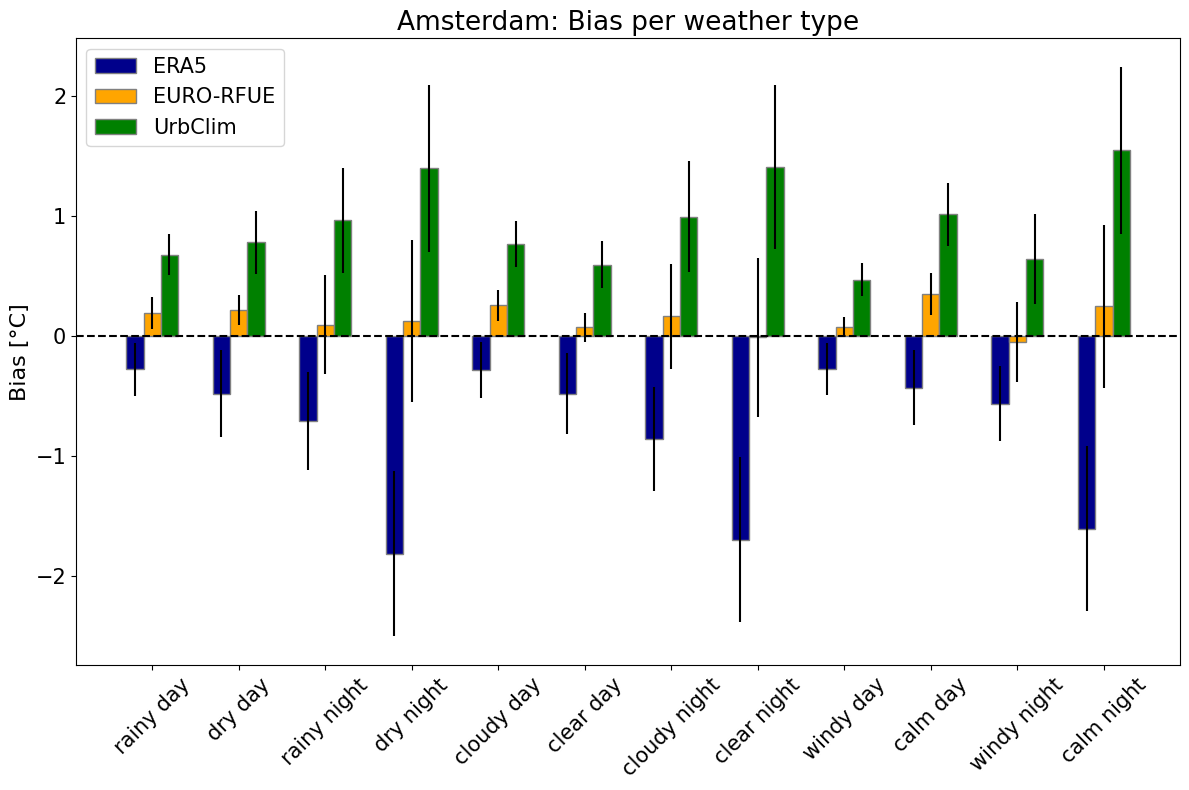

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have already defined `weather_types` and have data for each weather type

# Create lists to store biases for each weather type
Bias_ERA5_list = []
Bias_y_pred_list = []
Bias_y_test_list = []

SD_Bias_ERA5_list = []
SD_Bias_y_pred_list = []
SD_Bias_y_test_list = []

for weather_type in weather_types:
    filtered_data = globals()['test_' + weather_type]

    Bias_ERA5_weather = []
    Bias_y_pred_weather = []
    Bias_y_test_weather = []

    for station in filtered_data['Station'].unique():
        station_data = filtered_data[filtered_data['Station'] == station]

        Bias_ERA5 = np.mean(station_data['ERA5'] - station_data['Temperature'])
        Bias_y_pred = np.mean(station_data['y_pred'] - station_data['Temperature'])
        Bias_y_test = np.mean(station_data['y_test'] - station_data['Temperature'])

        Bias_ERA5_weather.append(Bias_ERA5)
        Bias_y_pred_weather.append(Bias_y_pred)
        Bias_y_test_weather.append(Bias_y_test)

    Bias_ERA5_list.append(np.mean(Bias_ERA5_weather))
    Bias_y_pred_list.append(np.mean(Bias_y_pred_weather))
    Bias_y_test_list.append(np.mean(Bias_y_test_weather))

    # Calculate standard deviations (SDs) for error bars
    SD_Bias_ERA5_list.append(np.std(Bias_ERA5_weather))
    SD_Bias_y_pred_list.append(np.std(Bias_y_pred_weather))
    SD_Bias_y_test_list.append(np.std(Bias_y_test_weather))

# Convert lists to NumPy arrays for easier indexing
Bias_ERA5_list = np.array(Bias_ERA5_list)
Bias_y_pred_list = np.array(Bias_y_pred_list)
Bias_y_test_list = np.array(Bias_y_test_list)

SD_Bias_ERA5_list = np.array(SD_Bias_ERA5_list)
SD_Bias_y_pred_list = np.array(SD_Bias_y_pred_list)
SD_Bias_y_test_list = np.array(SD_Bias_y_test_list)

# Plotting biases with error bars
fig, ax = plt.subplots(figsize=(12, 8))

barWidth = 0.2
r1 = np.arange(len(weather_types))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

colors = ['darkblue', 'orange', 'green']
labels = ['ERA5', 'EURO-RFUE', 'UrbClim']

# Plotting with error bars using SDs
ax.bar(r1, Bias_ERA5_list, color=colors[0], width=barWidth, edgecolor='grey', label=labels[0], yerr=SD_Bias_ERA5_list)
ax.bar(r2, Bias_y_pred_list, color=colors[1], width=barWidth, edgecolor='grey', label=labels[1], yerr=SD_Bias_y_pred_list)
ax.bar(r3, Bias_y_test_list, color=colors[2], width=barWidth, edgecolor='grey', label=labels[2], yerr=SD_Bias_y_test_list)

weather_types_labels = ['rainy day', 'dry day', 'rainy night', 'dry night',
                 'cloudy day', 'clear day', 'cloudy night', 'clear night',
                 'windy day', 'calm day', 'windy night', 'calm night']

ax.set_xticks(r2)
ax.set_xticklabels(weather_types_labels, rotation=45, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  # Set yticks font size
ax.axhline(y=0, color='black', linestyle='--')

ax.set_ylabel('Bias [°C]', fontsize=16)
ax.set_title('Amsterdam: Bias per weather type', fontsize=19)
# Depending on your data, adjust ylim accordingly
# ax.set_ylim(your_min_value, your_max_value)
#ax.set_ylim(-2.8, 2.8)

ax.legend(fontsize=15, loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
test['LCZ'].unique()
filtered_LCZ_2 = test[test['LCZ'] == 2]

# Get unique values from 'Station' column
unique_stations = filtered_LCZ_2['Station'].unique()

# Display the unique stations
print(unique_stations)

station_D2225= test[test['Station'] == 'D2225']

['D2194' 'D2198' 'D2225' 'D2227']


In [ ]:
station_D2225_rainy_day = station_D2225[(station_D2225['SOLAR_ELEV'] > 0) & (station_D2225['PRECIP'] > 0.001)]
station_D2225_dry_day = station_D2225[(station_D2225['SOLAR_ELEV'] > 0) & (station_D2225['PRECIP'] < 0.001)]
station_D2225_rainy_night = station_D2225[(station_D2225['SOLAR_ELEV'] < 0) & (station_D2225['PRECIP'] > 0.001)]
station_D2225_dry_night = station_D2225[(station_D2225['SOLAR_ELEV'] < 0) & (station_D2225['PRECIP'] < 0.001)]
station_D2225_cloudy_day = station_D2225[(station_D2225['SOLAR_ELEV'] > 0) & (station_D2225['TCC'] > 0.5)]
station_D2225_clear_day = station_D2225[(station_D2225['SOLAR_ELEV'] > 0) & (station_D2225['TCC'] < 0.5)]
station_D2225_cloudy_night = station_D2225[(station_D2225['SOLAR_ELEV'] < 0) & (station_D2225['TCC'] > 0.5)]
station_D2225_clear_night = station_D2225[(station_D2225['SOLAR_ELEV'] < 0) & (station_D2225['TCC'] < 0.5)]
station_D2225_windy_day = station_D2225[(station_D2225['SOLAR_ELEV'] > 0) & (station_D2225['WS'] > 4)]
station_D2225_calm_day = station_D2225[(station_D2225['SOLAR_ELEV'] > 0) & (station_D2225['WS'] < 4)]
station_D2225_windy_night = station_D2225[(station_D2225['SOLAR_ELEV'] < 0) & (station_D2225['WS'] > 4)]
station_D2225_calm_night = station_D2225[(station_D2225['SOLAR_ELEV'] < 0) & (station_D2225['WS'] < 4)]


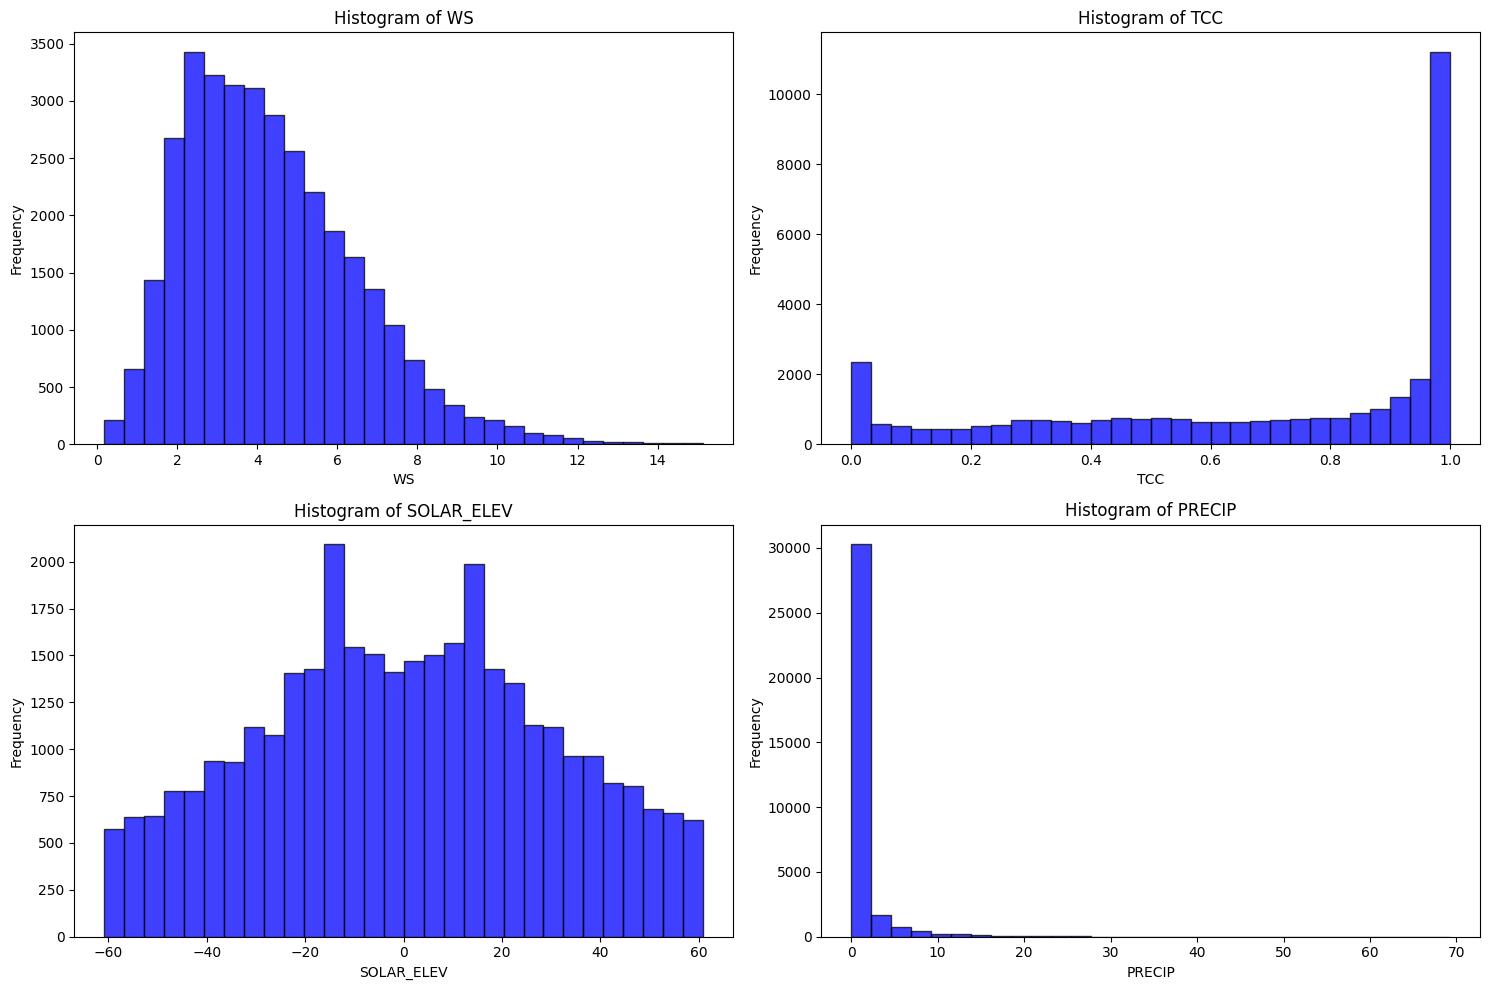

In [ ]:
# Assuming station_D2225 is your DataFrame
variables = ['WS', 'TCC', 'SOLAR_ELEV', 'PRECIP']

# Set up the plot
plt.figure(figsize=(15, 10))

# Iterate through each variable to plot
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each variable
    plt.hist(station_D2225[variable], bins=30, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


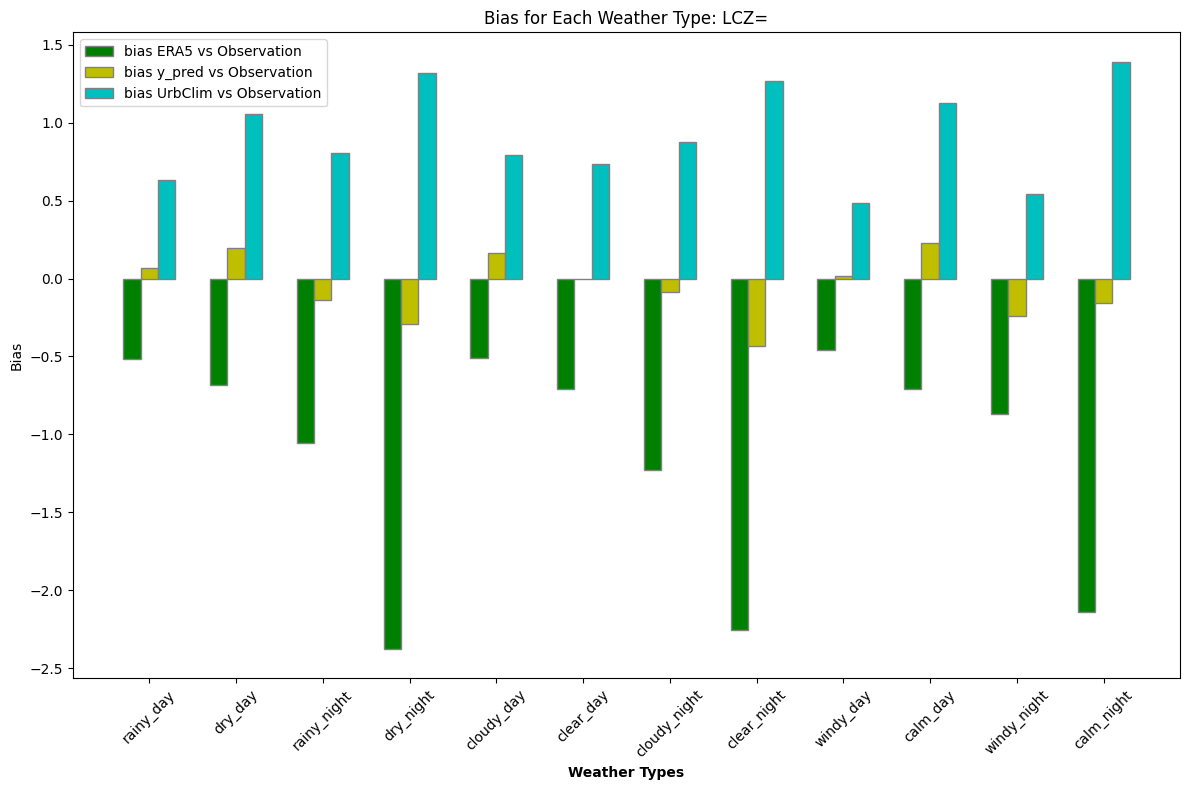

In [ ]:



import numpy as np
import matplotlib.pyplot as plt

# Define weather types
weather_types = ['rainy_day', 'dry_day', 'rainy_night', 'dry_night', 'cloudy_day', 'clear_day', 'cloudy_night', 'clear_night', 'windy_day', 'calm_day', 'windy_night', 'calm_night']

# Create lists to store biases for each weather type
biases = []

# Calculate biases for each weather type
for weather_type in weather_types:
    station_D2225 = globals()['station_D2225_' + weather_type]

    bias_y_pred_vs_y_test = np.mean(station_D2225['y_pred'] - station_D2225['y_test'])
    bias_y_test_vs_Temperature = np.mean(station_D2225['y_test'] - station_D2225['Temperature'])
    bias_y_pred_vs_Temperature = np.mean(station_D2225['y_pred'] - station_D2225['Temperature'])
    bias_ERA5_vs_Temperature = np.mean(station_D2225['ERA5'] - station_D2225['Temperature'])

    biases.append([ bias_ERA5_vs_Temperature, bias_y_pred_vs_Temperature, bias_y_test_vs_Temperature])

# Plot biases
fig, ax = plt.subplots(figsize=(12, 8))

barWidth = 0.2
r1 = np.arange(len(weather_types))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

colors = [ 'g', 'y', 'c']
labels = [ 'bias ERA5 vs Observation', 'bias y_pred vs Observation', 'bias UrbClim vs Observation']

for i in range(3):
    ax.bar([r + barWidth*i for r in r1], [bias[i] for bias in biases], color=colors[i], width=barWidth, edgecolor='grey', label=labels[i])

ax.set_xlabel('Weather Types', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(weather_types))])
ax.set_xticklabels(weather_types, rotation=45)
ax.set_ylabel('Bias')
ax.set_title('Bias for Each Weather Type: LCZ=')
ax.legend()

plt.tight_layout()
plt.show()
